1. Импорт библиотек и загрузка набора данных

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
df = pd.read_csv('cancer_reg.csv')
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.info()

Dataset contains 2834 rows and 34 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2834 non-null   float64
 1   avgDeathsPerYear         2834 non-null   int64  
 2   TARGET_deathRate         2834 non-null   float64
 3   incidenceRate            2834 non-null   float64
 4   medIncome                2834 non-null   int64  
 5   popEst2015               2834 non-null   int64  
 6   povertyPercent           2834 non-null   float64
 7   studyPerCap              2834 non-null   float64
 8   binnedInc                2834 non-null   object 
 9   MedianAge                2834 non-null   float64
 10  MedianAgeMale            2834 non-null   float64
 11  MedianAgeFemale          2834 non-null   float64
 12  Geography                2834 non-null   object 
 13  AvgHouseholdSize         2834 non-n

2. Проверка и очистка данных

In [19]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())
df.dropna(inplace=True)
df.head()
print("\nColumn Data Types:")
print(df.dtypes)
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("\nNon-numeric Columns:")
print(non_numeric_columns)
if 'binnedInc' in df.columns:
    df['binnedInc'] = df['binnedInc'].astype('category').cat.codes
if 'Geography' in df.columns:
    df.drop('Geography', axis=1, inplace=True)
print("\nDataset after handling non-numeric columns:")
df.info()


Missing Values in Each Column:
avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2134
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          147
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     563
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian

3. Сводная статистика

In [17]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
        avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count    540.000000        540.000000        540.000000     540.000000   
mean     672.050079        198.435185        178.670741     452.278659   
std     2002.298505        719.292294         26.757164      55.057854   
min        6.000000          3.000000         94.400000     234.000000   
25%       86.000000         30.000000        161.375000     425.000000   
50%      183.000000         65.000000        177.750000     453.549422   
75%      523.500000        128.500000        194.725000     480.925000   
max    38150.000000      14010.000000        292.500000    1014.200000   

          medIncome    popEst2015  povertyPercent  studyPerCap   binnedInc  \
count    540.000000  5.400000e+02      540.000000   540.000000  540.000000   
mean   47078.788889  1.135753e+05       16.741296   127.106606    4.537037   
std    11410.321078  5.141194e+05        6.223674   367.920497    2.830479   


4. Одномерный анализ: целевая переменная

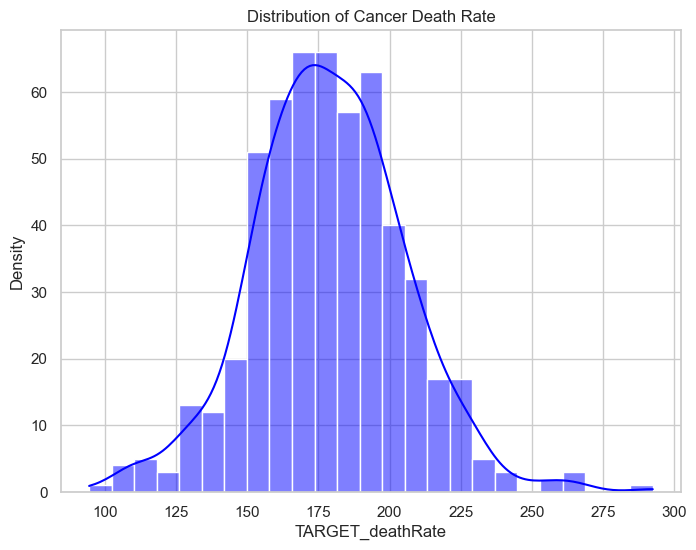

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['TARGET_deathRate'], kde=True, color="blue")
plt.title("Distribution of Cancer Death Rate")
plt.xlabel("TARGET_deathRate")
plt.ylabel("Density")
plt.show()

На графике показано распределение смертности от рака. Большинство значений сконцентрировано вокруг пика, что указывает на более распространенный уровень смертности. 

Тепловая карта показывает переменные, наиболее связанные с уровнем смертности от рака (TARGET_deathRate). Например, переменные с высокими положительными корреляциями (темно-красные области) указывают на то, что увеличение этих значений связано с увеличением смертности. Отрицательная корреляция (синие области) означает, что по мере увеличения значений уровень смертности снижается.

5. Одномерный анализ: другие числовые характеристики

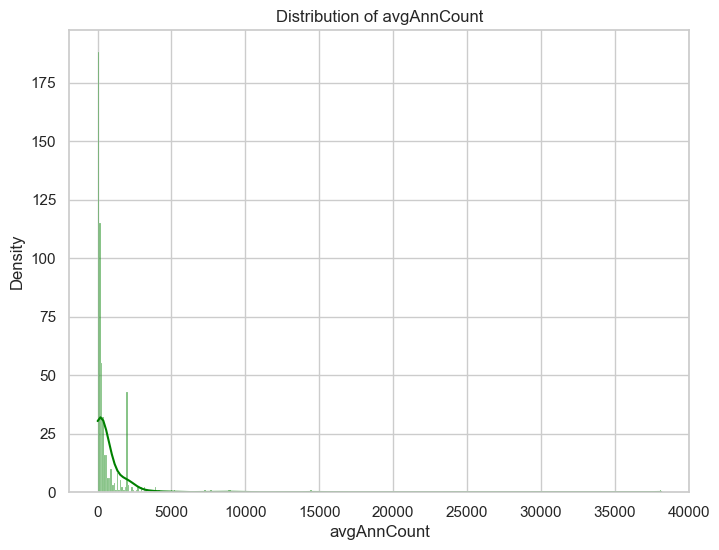

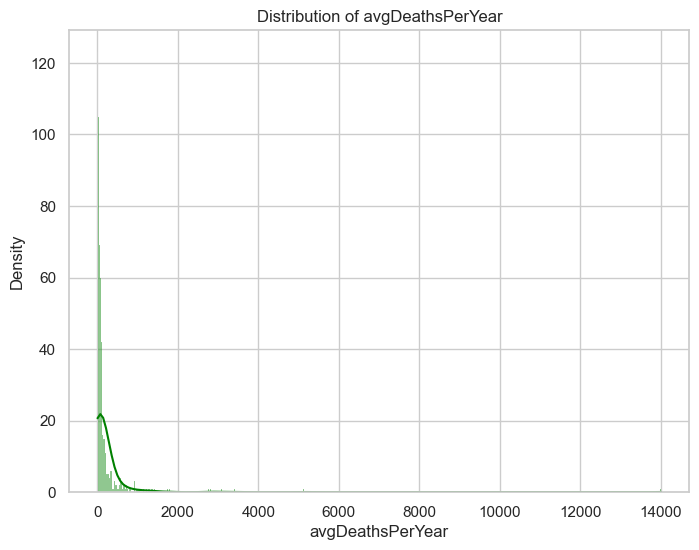

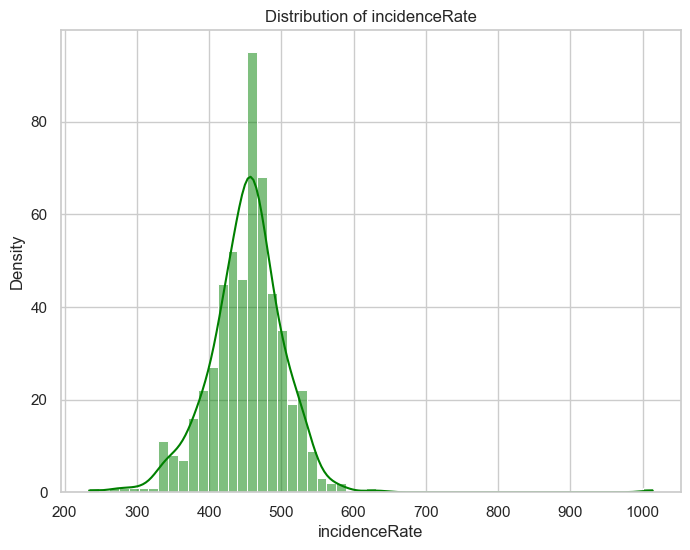

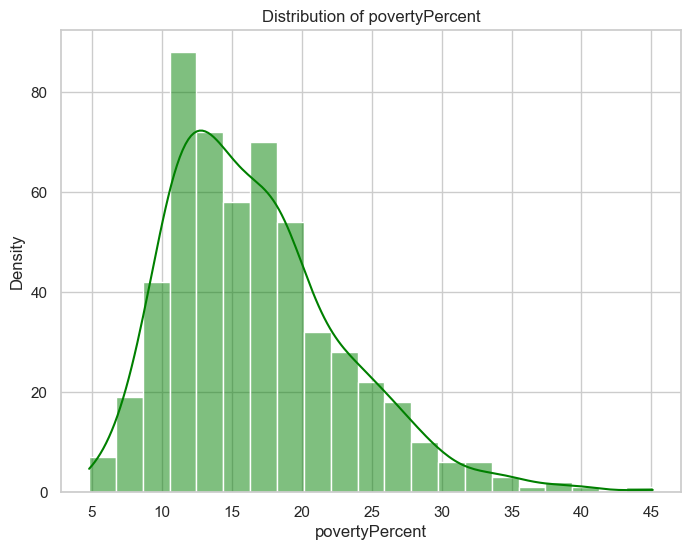

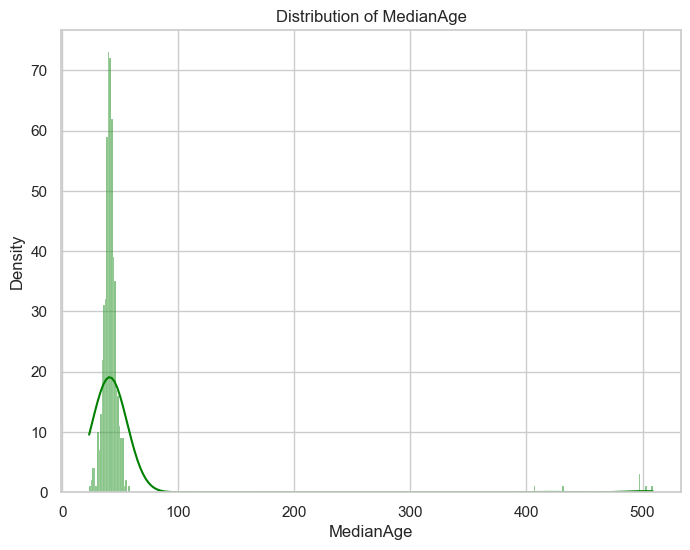

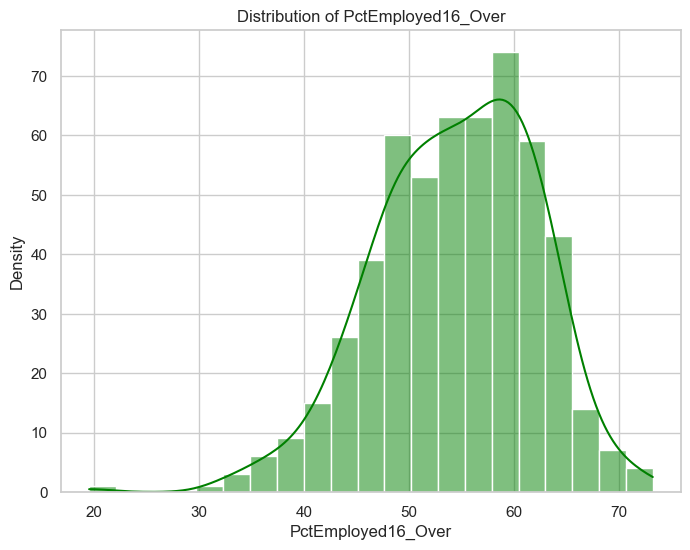

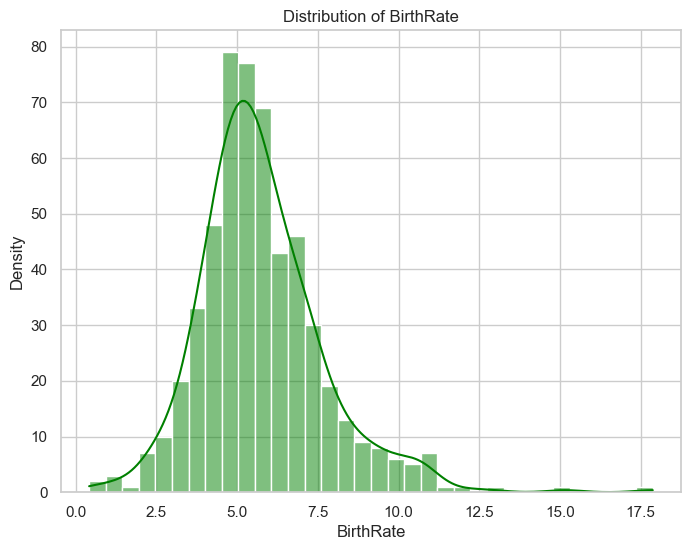

In [15]:
numerical_features = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 
                      'povertyPercent', 'MedianAge', 'PctEmployed16_Over', 'BirthRate']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, color="green")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

На графиках показано распределение каждого атрибута, например avgAnnCount, porePercent и MediaAge. Большинство функций имеют нормальное или асимметричное распределение. Некоторые из них могут иметь выбросы или неравномерное распределение.

6. Двумерный анализ: связи с целевой переменной

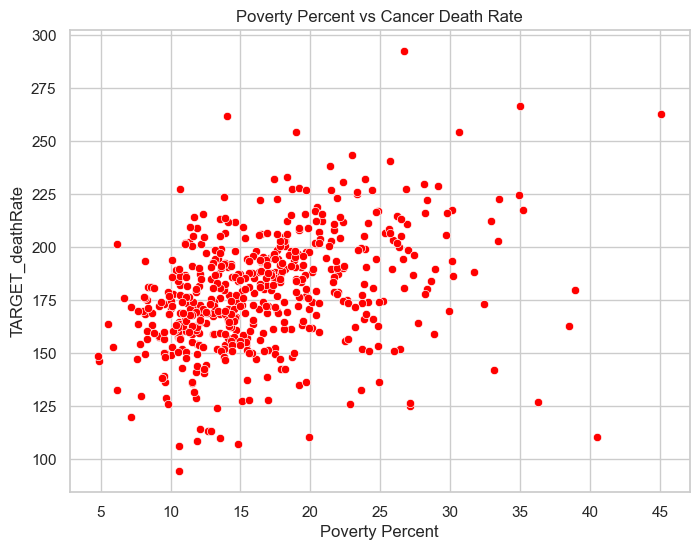

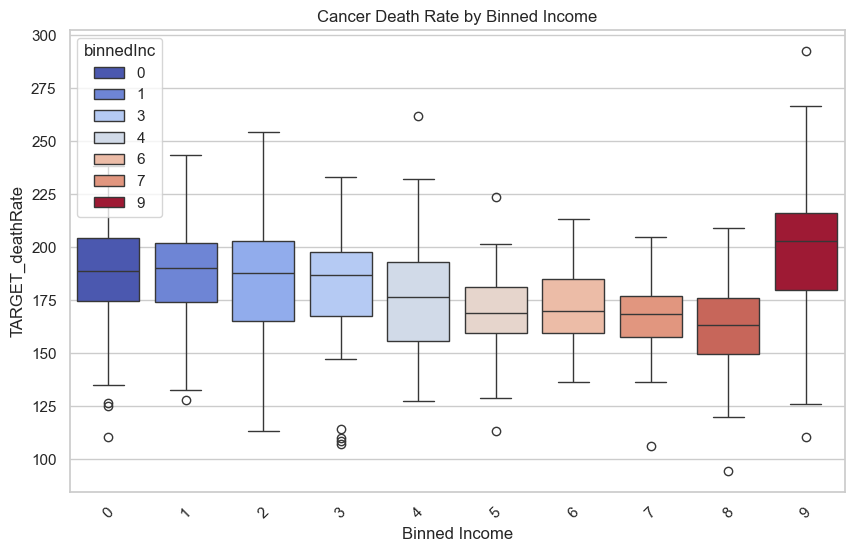

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='povertyPercent', y='TARGET_deathRate', data=df, color='red')
plt.title("Poverty Percent vs Cancer Death Rate")
plt.xlabel("Poverty Percent")
plt.ylabel("TARGET_deathRate")
plt.show()
if 'binnedInc' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='binnedInc', y='TARGET_deathRate', data=df, palette='coolwarm',hue='binnedInc')
    plt.title("Cancer Death Rate by Binned Income")
    plt.xlabel("Binned Income")
    plt.ylabel("TARGET_deathRate")
    plt.xticks(rotation=45)
    plt.show()

Двухмерный анализ эта диаграмма рассеивания исследует связь между процентом бедности и уровнем смертности от рака. Видимая тенденция (например, восходящая или нисходящая) указывает на корреляцию. Положительная тенденция предполагает, что более высокий уровень бедности связан с более высоким уровнем смертности от рака.Ящичная диаграмма показывает вариацию показателей смертности от рака в группах с разным уровнем дохода (сгруппированный доход). Отображаются медиана, межквартильный размах (IQR) и потенциальные выбросы для каждой группы. Группы с более низким уровнем дохода могут показывать более высокие показатели смертности, что указывает на экономическое неравенство в результатах здравоохранения.

7. Парные отношения

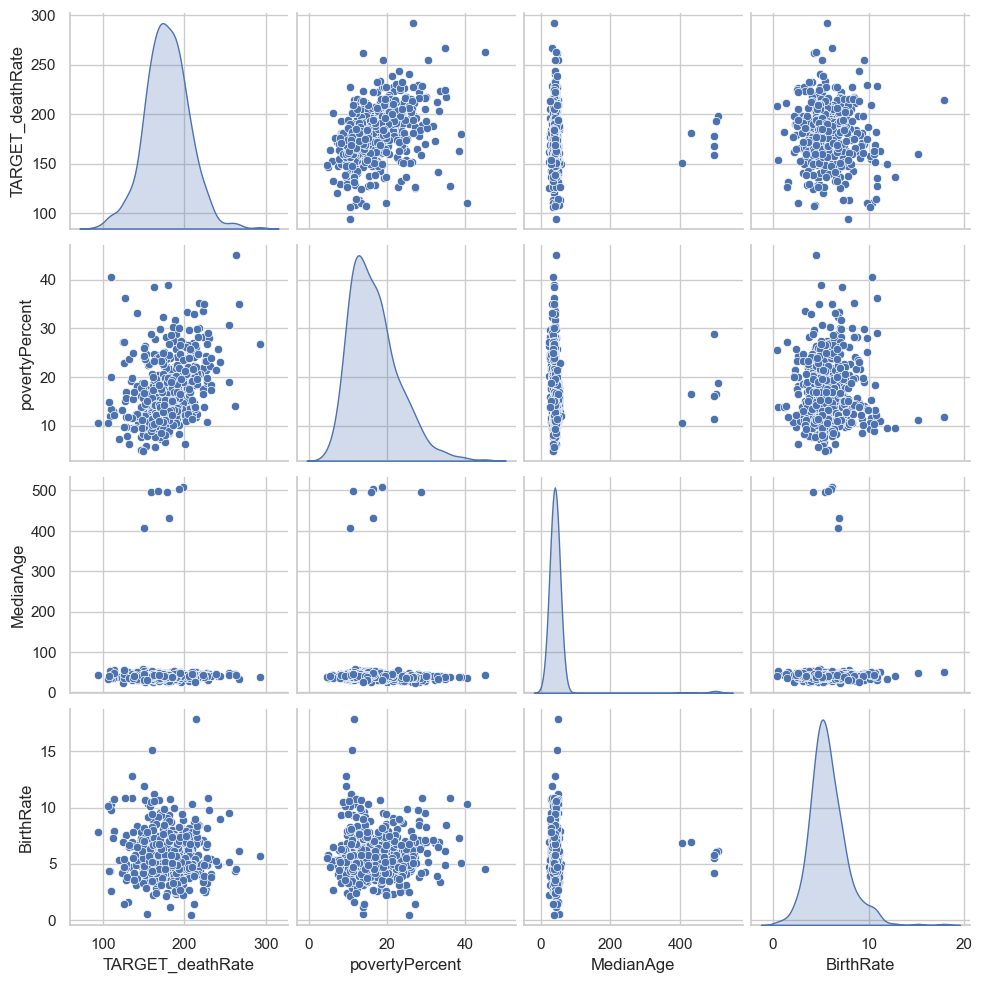

In [25]:
selected_features = ['TARGET_deathRate', 'povertyPercent', 'MedianAge', 'BirthRate']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()

Парный график показывает взаимосвязь между переменными, например povertyPercent, MedianAge, и BirthRate. Видны корреляционные тенденции между некоторыми переменными

8. Многомерный анализ

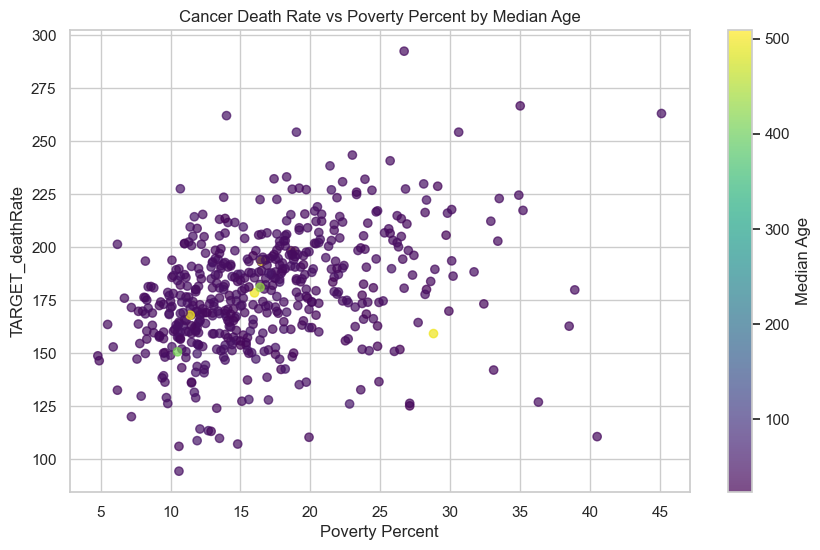

In [22]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(x=df['povertyPercent'], y=df['TARGET_deathRate'], 
                 c=df['MedianAge'], cmap='viridis', alpha=0.7)
plt.colorbar(sc, label="Median Age")
plt.title("Cancer Death Rate vs Poverty Percent by Median Age")
plt.xlabel("Poverty Percent")
plt.ylabel("TARGET_deathRate")
plt.show()

Цветовая карта показывает, что регионы с более высоким уровнем бедности и более низким средним возрастом населения имеют более высокие уровни смертности. Более тёмные точки соответствуют более молодым регионам.

9. Занятость и государственное медицинское страхование

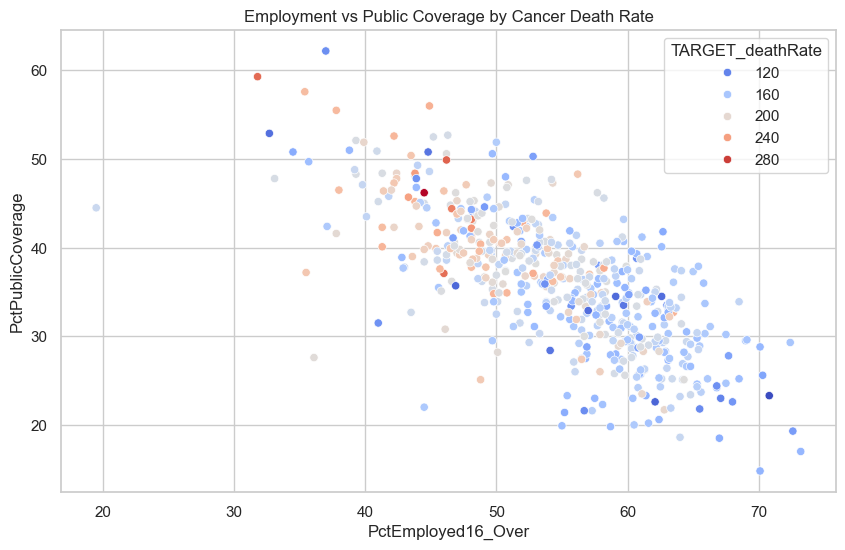

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PctEmployed16_Over', y='PctPublicCoverage', hue='TARGET_deathRate', data=df, palette='coolwarm')
plt.title("Employment vs Public Coverage by Cancer Death Rate")
plt.xlabel("PctEmployed16_Over")
plt.ylabel("PctPublicCoverage")
plt.show()

Эта диаграмма рассеивания исследует связь между уровнем занятости и охватом государственным здравоохранением. Интенсивность цвета (оттенок) представляет уровень смертности от рака.

10. Анализ корреляции признаков


Most Important Features Correlated with TARGET_deathRate:
TARGET_deathRate           1.000000
PctPublicCoverageAlone     0.393553
incidenceRate              0.383743
PctHS25_Over               0.374430
povertyPercent             0.369267
PctPublicCoverage          0.342128
PctUnemployed16_Over       0.327554
PctBachDeg18_24           -0.300152
PctPrivateCoverageAlone   -0.320864
PctPrivateCoverage        -0.344440
medIncome                 -0.364438
PctEmployed16_Over        -0.379253
PctBachDeg25_Over         -0.430093
Name: TARGET_deathRate, dtype: float64


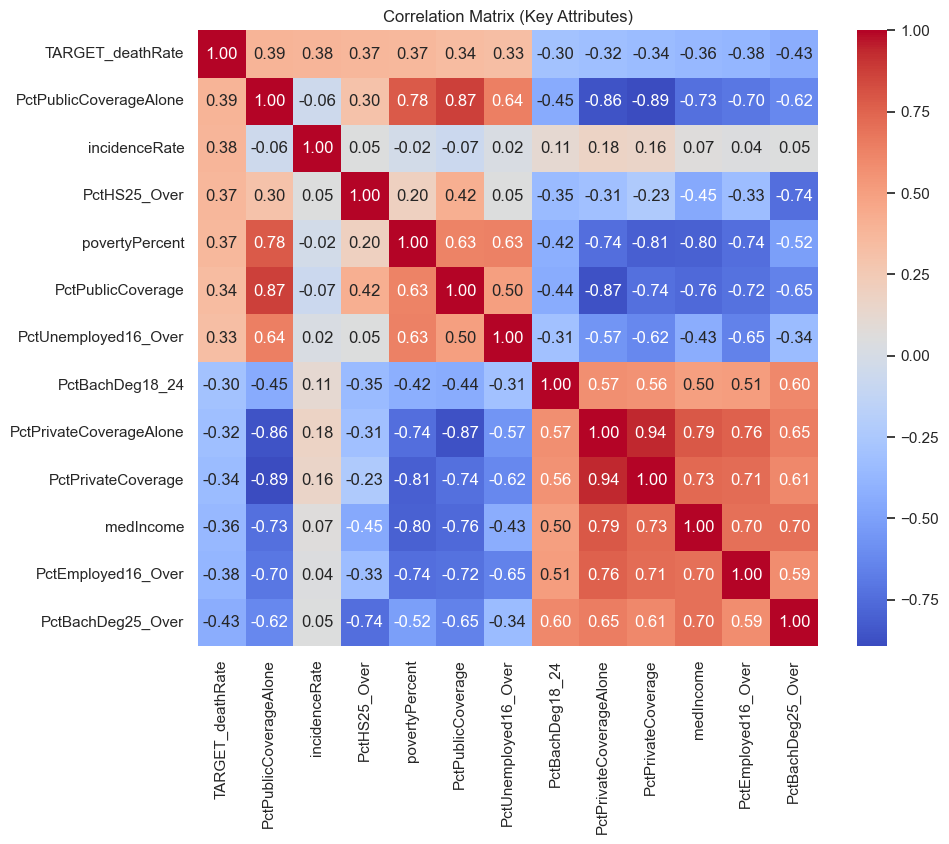

In [11]:
correlated_features = df.corr()['TARGET_deathRate'].sort_values(ascending=False)
important_features = correlated_features[abs(correlated_features) > 0.3].index
print("\nMost Important Features Correlated with TARGET_deathRate:")
print(correlated_features[abs(correlated_features) > 0.3])
important_correlation_matrix = df[important_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(important_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix (Key Attributes)")
plt.show()

Тепловая карта показывает переменные, наиболее связанные с уровнем смертности от рака (TARGET_deathRate). Например, переменные с высокими положительными корреляциями (темно-красные области) указывают на то, что увеличение этих значений связано с увеличением смертности. Отрицательная корреляция (синие области) означает, что по мере увеличения значений уровень смертности снижается.Результаты получения этой матрицы означают, что теперь мы знаем факторы, которые больше всего влияют на смертность, а именно:процент бедности, медианный возраст, уровень рождаемости и уровень заболеваемости.